<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<center><h1 style="font-size:2em;color:#2467C0"> Pandas -Parte 3  </h1></center>

<center><h2 style="font-size:2em;color:#840700">  Pandas - Operaciones y agregaciones  </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/pandas3.png" align="left" style="width:500px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

# Librerías

Cargando las bibliotecas que necesitamos 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Operaciones de datos en Pandas 

Parte de las características esenciales de **NumPy** es la capacidad de realizar operaciones rápidas de elementos, tanto con aritmética básica (suma, resta, multiplicación, etc.) como con operaciones más sofisticadas (funciones trigonométricas, funciones exponenciales y logarítmicas, etc.).
Pandas hereda gran parte de esta funcionalidad de **NumPy** y las _**ufuncs**_ que fueron presentadas en lecciones pasadas son clave para esto.

Sin embargo, **Pandas** incluye un par de características  extras que serán  útiles: para operaciones de negación y trigonométricas, estas _**ufuncs**_  preservarán las etiquetas de índice y columna en la salida, y para operaciones como la suma y la multiplicación, **Pandas** automáticamente *alineará índices*.
Esto significa que mantener el contexto de los datos y combinar datos de diferentes fuentes, ambas tareas potencialmente propensas a errores con arreglos de **NumPy** sin procesar, se vuelven esencialmente infalibles con **Pandas**.


In [12]:
poblacion = pd.Series({'Belgica':11.3, 'Francia':64.3, 'Alemania':81.3,
                       'Holanda':16.9, 'Inglaterra':64.9,'Argentina':12.1,'Mexico':103.2})

In [13]:

data = {'pais': ['Belgica', 'Francia', 'Alemania', 'Holanda', 'Inglaterra','Argentina','Mexico'],
        'poblacion': [11.3, 64.3, 81.3, 16.9, 64.9, 12.1,103.2],
        'area': [30510, 671308, 357050, 41526, 244820,300163,1960573],
        'capital': ['Bruselas', 'Paris', 'Berlin', 'Amsterdam', 'Londres','Buenos Aires','Ciudad de Mexico']}
paises = pd.DataFrame(data)


In [11]:
#mostrar el dataframe
#paises.head()
paises.tail()

pais  poblacion     area           capital
2    Alemania       81.3   357050            Berlin
3     Holanda       16.9    41526         Amsterdam
4  Inglaterra       64.9   244820           Londres
5   Argentina       12.1   300163      Buenos Aires
6      Mexico      103.2  1960573  Ciudad de Mexico

## Los "nuevos" conceptos


Al igual que con loss arreglos de numpy, muchas operaciones son con elementos:

In [16]:
#Dividir entre 100 los valores de la poblacion en la serie poblacion
poblacion = poblacion/100
poblacion

Belgica       0.113
Francia       0.643
Alemania      0.813
Holanda       0.169
Inglaterra    0.649
Argentina     0.121
Mexico        1.032
dtype: float64

In [18]:
#Encontrar la densidad poblacional en el DataFrame paises
paises['densidad'] = paises['poblacion']/paises['area']
paises

pais  poblacion     area           capital  densidad
0     Belgica       11.3    30510          Bruselas  0.000370
1     Francia       64.3   671308             Paris  0.000096
2    Alemania       81.3   357050            Berlin  0.000228
3     Holanda       16.9    41526         Amsterdam  0.000407
4  Inglaterra       64.9   244820           Londres  0.000265
5   Argentina       12.1   300163      Buenos Aires  0.000040
6      Mexico      103.2  1960573  Ciudad de Mexico  0.000053

In [20]:
#Obtener el logaritmo del valor de la población en el DataFrame countries
np.log( paises['poblacion']  )

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
5    2.493205
6    4.636669
Name: poblacion, dtype: float64

In [21]:
#Agregar los valores de la evaluación del logaritmo como una nueva columna "log_poblacion"
paises['Log_poblacion'] = np.log(paises['poblacion'])
paises

pais  poblacion     area           capital  densidad  Log_poblacion
0     Belgica       11.3    30510          Bruselas  0.000370       2.424803
1     Francia       64.3   671308             Paris  0.000096       4.163560
2    Alemania       81.3   357050            Berlin  0.000228       4.398146
3     Holanda       16.9    41526         Amsterdam  0.000407       2.827314
4  Inglaterra       64.9   244820           Londres  0.000265       4.172848
5   Argentina       12.1   300163      Buenos Aires  0.000040       2.493205
6      Mexico      103.2  1960573  Ciudad de Mexico  0.000053       4.636669

In [22]:
#Mostrar las columnas del  DataFrame paises
paises.columns

Index(['pais', 'poblacion', 'area', 'capital', 'densidad', 'Log_poblacion'], dtype='object')

In [25]:
#Mostrar cuales de ellos tienen una población mayor a los 40 (millones)
paises[ paises['poblacion'] > 40 ]

pais  poblacion     area           capital  densidad  Log_poblacion
1     Francia       64.3   671308             Paris  0.000096       4.163560
2    Alemania       81.3   357050            Berlin  0.000228       4.398146
4  Inglaterra       64.9   244820           Londres  0.000265       4.172848
6      Mexico      103.2  1960573  Ciudad de Mexico  0.000053       4.636669

In [45]:
#Mostrar el dataframe solo con las columnas 'pais'  y 'capital'
paises[['pais','capital']]

pais           capital
0     Belgica          Bruselas
1     Francia             Paris
2    Alemania            Berlin
3     Holanda         Amsterdam
4  Inglaterra           Londres
5   Argentina      Buenos Aires
6      Mexico  Ciudad de Mexico

Cuando requiere de una operación especial en los elementos puede hacerlo con ``apply(OPERACIÓN)``, en donde será necesario definir la  operación a través de la función deseada

In [ ]:
# Agregar una columna que indique si el país es pequeño o grande en población (>50). 
# Defina una función llamada etiqueta_poblacion que regrese la etiqueta

In [38]:
def etiqueta_poblacion(valor_poblacion):
    if valor_poblacion > 50:
        return 'grande'
    else:
        return 'pequeño'

In [39]:
 paises['poblacion'].apply(  etiqueta_poblacion )

0    pequeño
1     grande
2     grande
3    pequeño
4     grande
5    pequeño
6     grande
Name: poblacion, dtype: object

In [42]:
#Agregar la columna etiqueta_poblacional con el resultado de aplicar la funcion etiqueta_poblacion
paises['etiqueta_poblacional'] = paises['poblacion'].apply( etiqueta_poblacion )
paises 

pais  poblacion     area           capital  densidad  Log_poblacion  \
0     Belgica       11.3    30510          Bruselas  0.000370       2.424803   
1     Francia       64.3   671308             Paris  0.000096       4.163560   
2    Alemania       81.3   357050            Berlin  0.000228       4.398146   
3     Holanda       16.9    41526         Amsterdam  0.000407       2.827314   
4  Inglaterra       64.9   244820           Londres  0.000265       4.172848   
5   Argentina       12.1   300163      Buenos Aires  0.000040       2.493205   
6      Mexico      103.2  1960573  Ciudad de Mexico  0.000053       4.636669   

  etiqueta_poblacional  
0              pequeño  
1               grande  
2               grande  
3              pequeño  
4               grande  
5              pequeño  
6               grande

También es posible utilizar la función ``lambda``  para realizar operaciones rápidas.

In [48]:
# Encuentre el número de caracteres de las palabras en la columna capital 
def conteo(string):
    return len(string)
paises['capital'].apply(  conteo )

0     8
1     5
2     6
3     9
4     7
5    12
6    16
Name: capital, dtype: int64

In [49]:
paises['capital'].apply( lambda  string :  len(string))

0     8
1     5
2     6
3     9
4     7
5    12
6    16
Name: capital, dtype: int64

## Agregaciones (reducciones)

Pandas proporciona un amplio conjunto de funciones de _**resumen**_ que operan en diferentes tipos de objetos de pandas (DataFrames y Series) y producen un valor único. Cuando se aplica a un *DataFrame*, el resultado se retorna como una Serie de Pandas (un valor para cada columna).

In [52]:
#Utilizando la Serie de poblacion, podemos encontrar su promedio usando mean():
poblacion.mean()

0.5057142857142857

In [58]:
#Aplicar la mediana al DataFrame paises
paises.median( numeric_only = True )

poblacion            64.300000
area             300163.000000
densidad              0.000228
Log_poblacion         4.163560
dtype: float64

In [61]:
#Podemos encontrar el pais con con area mas pequeña usando min():
paises['area'].min()

30510

La siguiente tabla resume algunas otras agregaciones integradas de Pandas:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

Todos estos son funcionan en *DataFrames* y *Series*.


Hay una función de muy útil, ``describe()`` , que calcula varios parámetros estadísticos  para cada columna y devuelve el resultado.

In [62]:
paises.describe()

poblacion          area  densidad  Log_poblacion
count    7.000000  7.000000e+00  7.000000       7.000000
mean    50.571429  5.151357e+05  0.000208       3.588078
std     37.112115  6.729440e+05  0.000150       0.962601
min     11.300000  3.051000e+04  0.000040       2.424803
25%     14.500000  1.431730e+05  0.000074       2.660260
50%     64.300000  3.001630e+05  0.000228       4.163560
75%     73.100000  5.141790e+05  0.000318       4.285497
max    103.200000  1.960573e+06  0.000407       4.636669

# Ejercicios con los datos del Titanic

Descripción de las columnas :

    Survival - Supervivencia (0 = No; 1 = Si).
    Pclass - Clase (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name - Nombre
    Sex - Sexo
    Age - Edad
    Sibsp - Número de hermanos / cónyuges a bordo
    Parch - Número de padres / niños a bordo
    Ticket - Número de ticket
    Fare - Tarifa
    Cabin - Número de cabina
    Embarked - Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)



In [65]:
#Utilizar el archivo datos/titanic.csv
df = pd.read_csv('datos/titanic.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [72]:
#muestre las primeras líneas del DataFrame
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [69]:
#muestre las ultimas líneas  del DataFrame 
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [73]:
#Obtenga el número de filas y columnas
df.shape

(891, 12)

array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

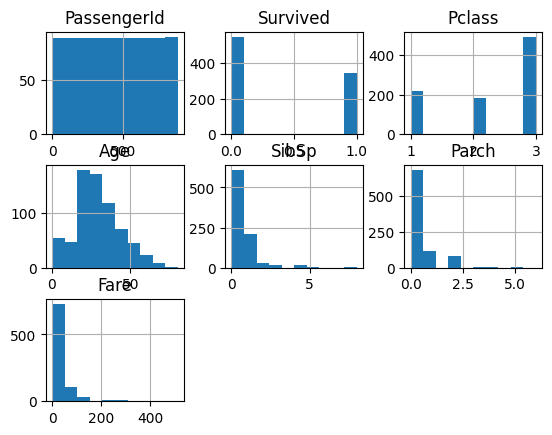

In [74]:
#Muestre los histogramas de las variables numericas 
df.hist()

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Hacer lo mismo con las pasajeras.</li>
</ul>
</div>

In [75]:
#Se puede definir un nuevo DataFrame solamente con elementos "male" en la columna de Sex
df_male=  df[ df['Sex'] == 'male' ]
df_male.head()

PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S

In [77]:
#Se encuentra la media utilizando el nuevo DataFrame
df_male['Age'].mean()

30.72664459161148

In [81]:
df[ df['Sex'] == 'male' ]['Age'].mean()

30.72664459161148

In [82]:
#Redondeando el valor anterior a dos decimales
round(  df[ df['Sex'] == 'male' ]['Age'].mean(),  2 )

30.73

In [84]:
#Para el segundo requerimiento se puede realizar todo en una sola linea, redondeando el valor anterior a dos decimales
round(df[ df['Sex'] == 'female']['Age'].mean(),2)

27.92

In [ ]:
#Redondeando el valor anterior a dos decimales
 

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>¿Cuántos pasajeros mayores de 70 estaban en el Titanic?</li>
</ul>
</div>

In [87]:
#Se puede aplicar una máscara para seleccionar solamente a los pasajeros mayores a 70 años, 
#Al DataFrame resultante se cuentan las filas usando len()
len( df [ df['Age'] > 70 ] )

5

In [89]:
#Un segundo método es aplicar la función sum() a la máscara booleana, 
#Solamente se sumaran los elementos True
(df['Age'] > 70).sum()

5

In [92]:
df [ df['Age'] > 70 ]['Age'].count()

5

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>¿Seleccionar los pasajeros que tienen entre 30 y 40 años?</li>
</ul>
</div>

In [93]:
df [ (df['Age'] >30) & (df['Age']<40)]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
4              5         0       3   
13            14         0       3   
18            19         0       3   
..           ...       ...     ...   
867          868         0       1   
872          873         0       1   
881          882         0       3   
885          886         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
..                                                 ...     ...   ...    ...   
867               Roebling, Mr. Washington Augustus II    male  31.0      0   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
881                                 Markun, Mr. Johann    male  33.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
4        0    373450   8.0500          NaN        S  
13       5    347082  31.2750          NaN        S  
18       0    345763  18.0000          NaN        S  
..     ...       ...      ...          ...      ...  
867      0  PC 17590  50.4958          A24        S  
872      0       695   5.0000  B51 B53 B55        S  
881      0    349257   7.8958          NaN        S  
885      5    382652  29.1250          NaN        Q  
890      0    370376   7.7500          NaN        Q  

[142 rows x 12 columns]

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Divida la columna 'Name' y  extraiga la primera parte (el apellido) y agréguela como nueva columna 'Surname', para el resto del nombre agregarlo en una nueva columna llamada 'R-name'</li>
</ul>

<br>
</div>

In [ ]:
#Para la columna Surname se definirá una nueva función
 

In [ ]:
#Aplicando la funcion en el DataFrame
 

In [ ]:
#Para la columna R-name utilizaremos una función lambda
 

<div class="alert alert-info">

<b>EJERCICIO</b>:

    
Agregar una nueva columna llamada “Categoria”, la cual tendrá como elementos las siguientes etiquetas segun el valor del ticket:

* Si el valor es menor a 20, L -- Ticket -- Pclass -- Fare
* Si el valor es mayor o igual a 20 pero menor a 50, M -- Ticket -- Pclass -- Fare
* Si el valor es mayor o igual 50, H -- Ticket -- Pclass -- Fare

Ejemplo:    
L--A/5 21171--3--7.25
    
H--PC 17599--1--71.2833
    
L--STON/O2. 3101282--3--7.925
    
</div>

In [96]:
def tag( x ):
    if ( x[0] < 20 ):
        return 'L-'+x[1]+'-' +str(x[2]) + '-' + str(x[0])
    else:
        return 'H-'+x[1]+'-' +str(x[2]) + '-' + str(x[0])      

In [100]:
df['Categoria']= df[ ['Fare','Ticket','Pclass'] ].apply(tag, axis=1)
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked             Categoria  
0      0  A/5 21171   7.2500   NaN        S    L-A/5 21171-3-7.25  
1      0   PC 17599  71.2833   C85        C  H-PC 17599-1-71.2833

# Parte 1

<div class="alert alert-success">

<b>EJERCICIO 1 </b>: 
    
    
Encontrar el promedio de edad para los pasajeros de cada clase, así como su desviación estándar.
    
    
</div>

<div class="alert alert-success">

<b>EJERCICIO 2</b>: 
  
Encontrar el número total de pasajeros por cada punto de embarcación.     
    
</div>

<div class="alert alert-success">

<b>EJERCICIO 3</b>: 
  
a) Encontrar el promedio de edad de los pasajeros que sobrevivieron. 
    
b) Encontrar el promedio de edad de los hombres que sobrevivieron
    
c) Encontrar el promedio de edad de las mujeres que sobrevivieron
</div>


<div class="alert alert-success">

<b>EJERCICIO 4</b>: 
  
¿Cuál fue el número de sobrevivientes mujeres  mayores a 40 años? ¿Cuál era la probabilidad de supervivencia para  mujeres mayores a 40 años?

</div>





<div class="alert alert-success">

<b>EJERCICIO 5</b>:

    
Agregar una nueva columna llamada “Status”, la cual tendrá como elementos las siguientes etiquetas segun la edad:

* Adult-male, si el pasajero es hombre y mayor a 21 años
* Adult-female, si el pasajero es mujer  y mayor a 21 años
* Minor-male, si el pasajero es hombre y su edad es menor o igual  a 21 años
* Minor-female, si el pasajero es mujer y  su edad es menor o igual a 21 años

</div>

# Parte 2:  Escuelas de Jalisco 
Utilizar los datos del archivo "cct_estadistica_short.csv" para realizar los siguientes ejercicios


In [101]:
#Leer los datos 
df = pd.read_csv('datos/cct_estadistica_short.csv',  encoding='latin1') 

In [ ]:
#Desplegar parte del dataframe
df.head()

In [ ]:
#Resumen estadistico de los campos
df.describe()

In [ ]:
#Mostrar los nombres de las columnas del dataframe
df.columns

<div class="alert alert-success">
    <b>EJERCICIO 6 </b>:
 <ul>
  <li> Encuentre el número de estudiantes por nivel educativo (PRIMARIA, SECUNDARIA y BACHILLERATO). </li>
</ul> 

</div>

<div class="alert alert-success">
    <b>EJERCICIO 7 </b>:
 <ul>
  <li>  Encuentre el número de estudiantes hombres y mujeres por nivel educativo (PRIMARIA, SECUNDARIA y BACHILLERATO).    </li>
</ul> 

</div>

<div class="alert alert-success">
    <b>EJERCICIO 8 </b>:
 <ul>
  <li>  ¿Cuál es el promedio de docentes por nivel educativo?  </li>
</ul> 

</div>

<div class="alert alert-success">
    <b>EJERCICIO 9 </b>:
 <ul>
  <li>   Encuentre el porcentaje de  escuelas Particulares </li>
</ul> 

</div>


<div class="alert alert-success">
    <b>EJERCICIO 10 </b>:
 <ul>
  <li>   Encuentre el porcentaje de  escuelas PREESCOLAR, PRIMARIA,  SECUNDARIA y BACHILLERATO  </li>
</ul> 

</div>

